In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [10]:
df = pd.read_csv('dataSet/housing.csv')
x_features = df[['total_rooms', 'median_income', 'population', 'housing_median_age']]
x_train = x_features
y_train =  df['median_house_value']

In [11]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_train)
print(f"Peal to Peak range by column in Raw  X:{np.ptp(x_train, axis=0)}")
print(f"Peal to Peak range by column in Normalized  X:{np.ptp(x_norm, axis=0)}")

Peal to Peak range by column in Raw  X:total_rooms           39318.0000
median_income            14.5002
population            35679.0000
housing_median_age       51.0000
dtype: float64
Peal to Peak range by column in Normalized  X:[18.02286287  7.63258528 31.50645277  4.05236201]


In [12]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(x_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 11, number of updates: 227041.0


In [13]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:  w:{w_norm}, b:{b_norm}")

model parameters:  w:[ 18514.65896463  78349.04038566 -13974.69176738  23799.05630619], b:[207087.30929337]


In [14]:
y_pred_sgd = sgdr.predict(x_norm)
y_pred = np.dot(x_norm, w_norm) + b_norm
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"prediction on training set:\n{y_pred[:4]}")
print(f"target values:\n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
prediction on training set:
[412887.91300081 401210.05319538 392486.42354041 323507.67261463]
target values:
0    452600.0
1    358500.0
2    352100.0
3    341300.0
Name: median_house_value, dtype: float64


InvalidIndexError: (slice(None, None, None), 0)

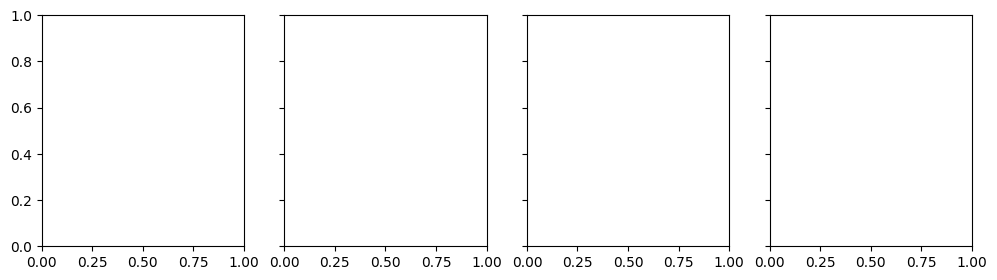

In [15]:
fig, ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label='Target')
    ax[i].set_xlabel(x_features[i])
    ax[i].scatter(x_train[:,i],y_pred,color='red',label='Prediction')
ax[0].set_ylabel('Price'); ax[0].legend();
fig.suptitle('Linear Regression: target versus prediction using z-score normalized model')
plt.show()